In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def opticalFlow(referenceFrameSec):
    cap = cv2.VideoCapture("/users/iamns45/Desktop/CV/CV-3/Que-1/Que3-1.mp4")
    ret, first_frame = cap.read()
    prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
    mask = np.zeros_like(first_frame)
    mask[..., 1] = 255
    i=1
    while(cap.isOpened()):
        ret, frame = cap.read()
        cv2.imshow("Input Window", frame)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculates dense optical flow by Farneback method
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray,None,0.5, 3, 15, 3, 5, 1.2, 0)
        # Computes the magnitude and angle of the 2D vectors
        magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Sets image hue according to the optical flow
        # direction
        mask[..., 0] = angle * 180 / np.pi / 2
        # Sets image value according to the optical flow
        # magnitude (normalized)
        mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
        # Converts HSV to RGB (BGR) color representation
        rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
        #pens a new window and displays the output frame
        cv2.imshow("dense optical flow", rgb)
        # Updates previous frame
        if (referenceFrameSec == 1):
            prev_gray = gray
        elif (referenceFrameSec != 1):
            if i%referenceFrameSec == 0:
                prev_gray = gray    
        if(i%30 ==0 ):
            plt.axis('off')
            plt.imshow(rgb,cmap='gray', vmin=0, vmax=255)
            plt.show()
                
        i=i+1
        # Frames are read by intervals of 1 millisecond. The
        # programs breaks out of the while loop when the
        # user presses the 'q' key
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

Every 11th Frame as Reference

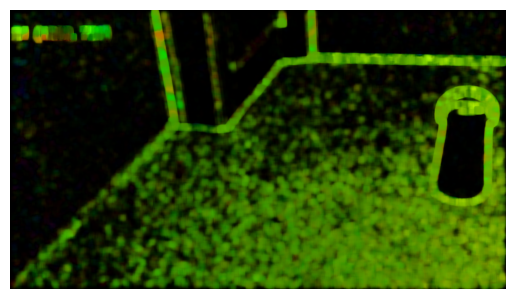

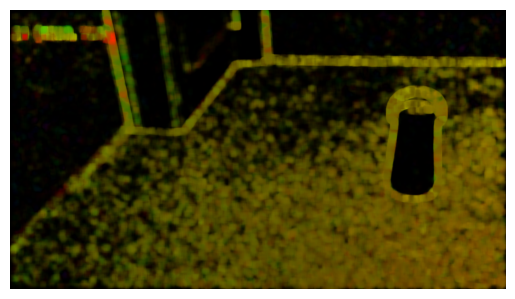

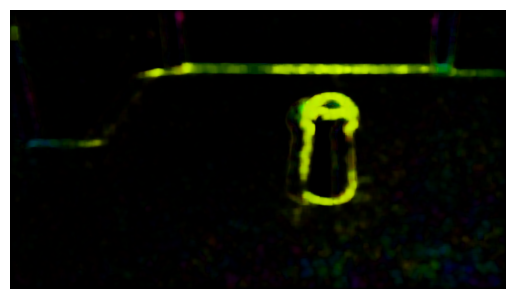

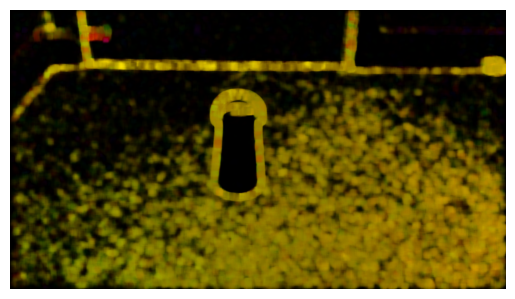

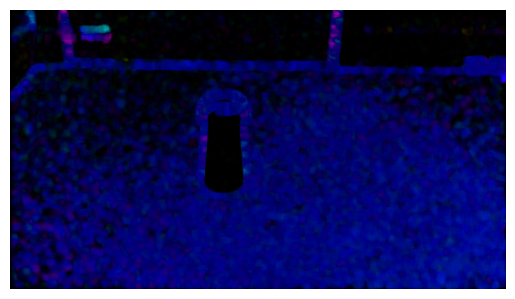

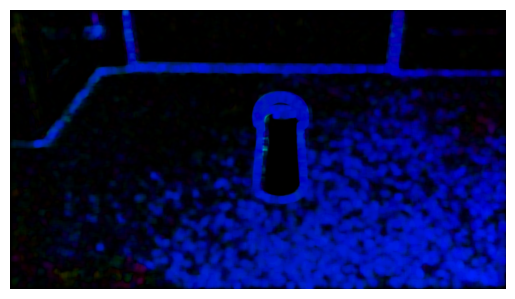

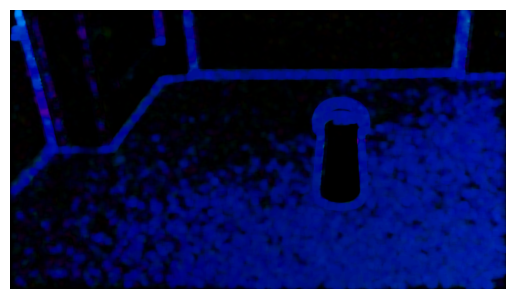

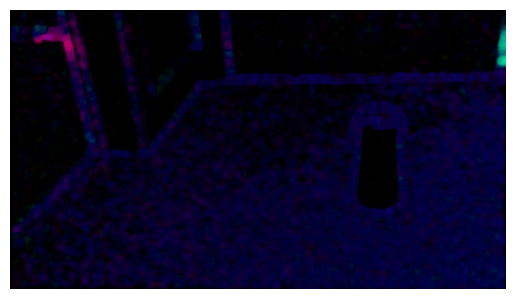

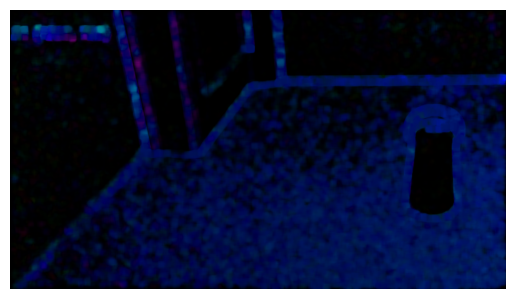

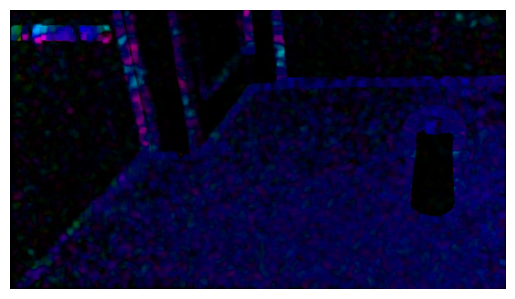

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [17]:
opticalFlow(1)

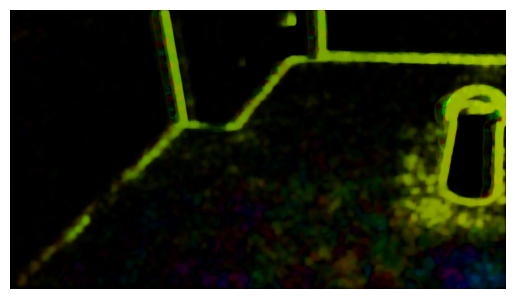

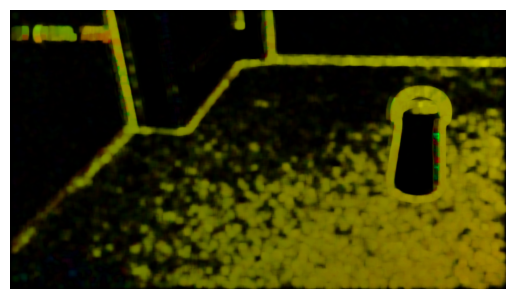

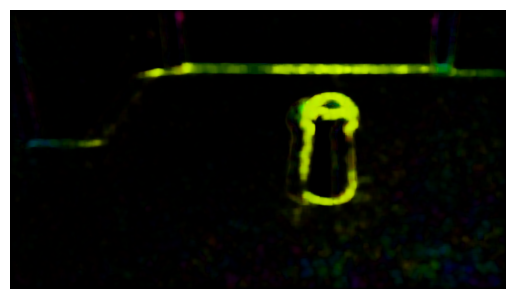

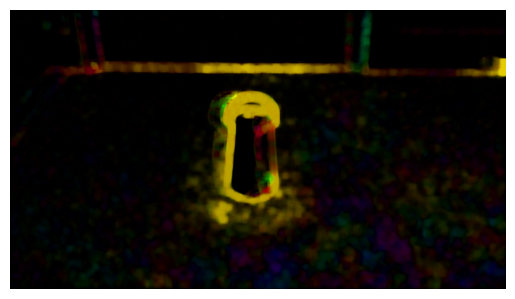

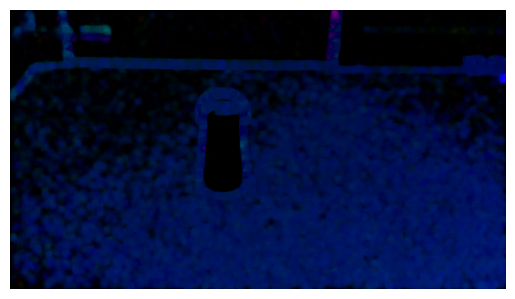

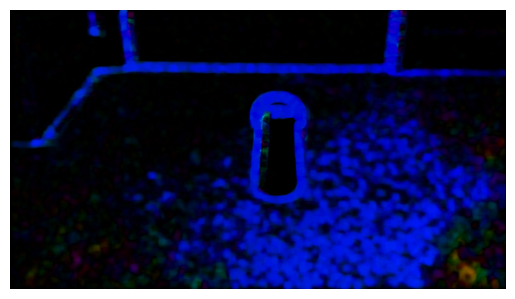

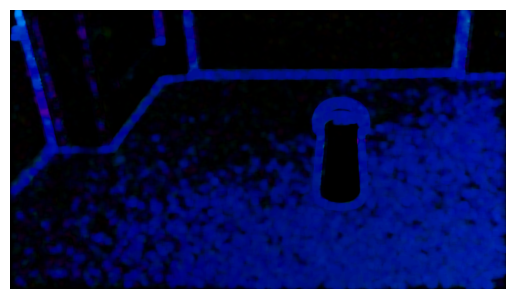

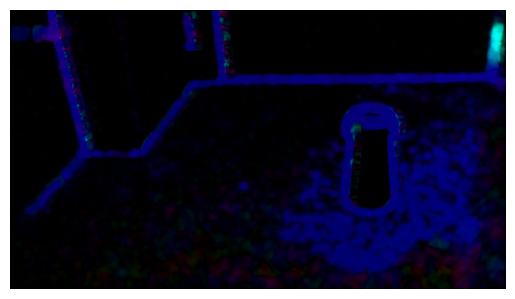

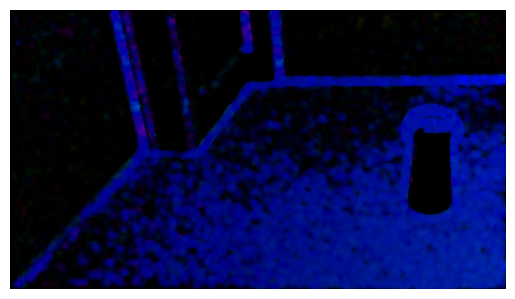

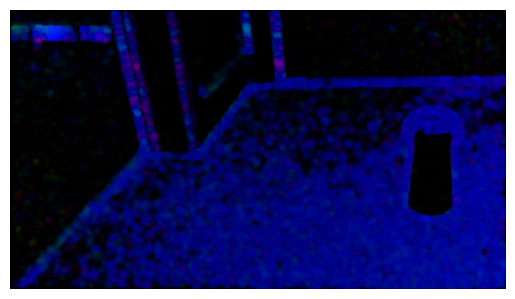

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [18]:
opticalFlow(11)

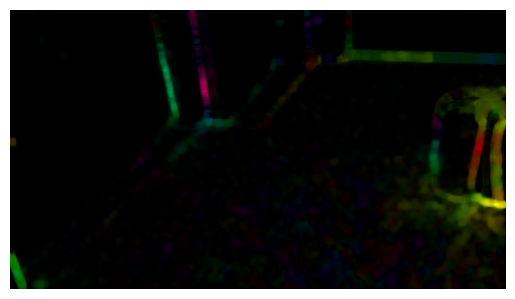

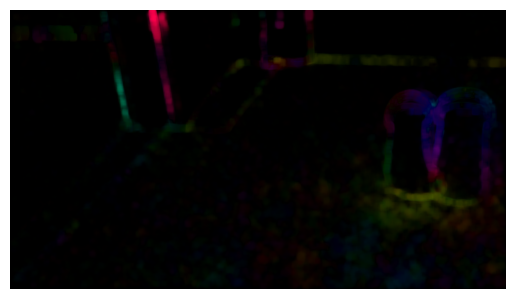

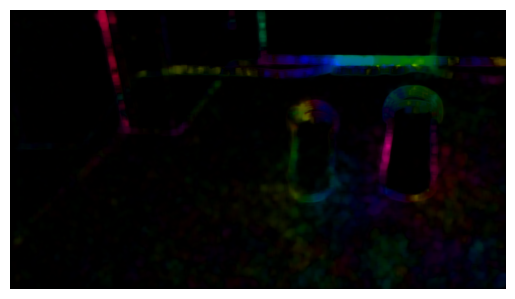

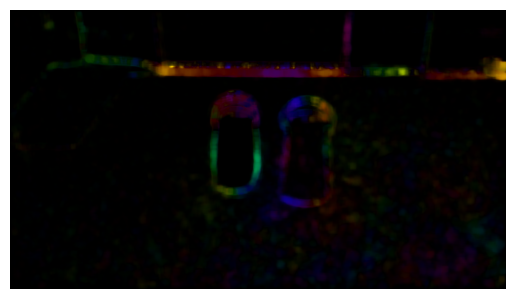

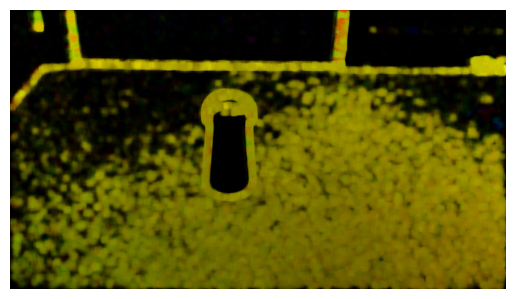

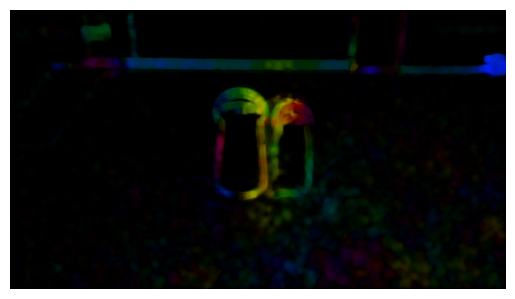

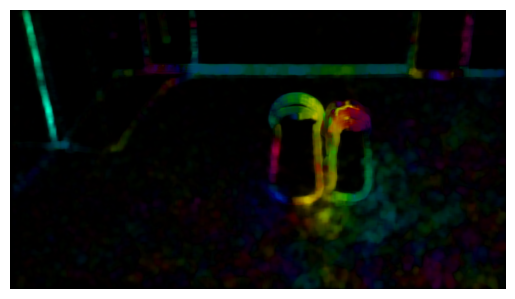

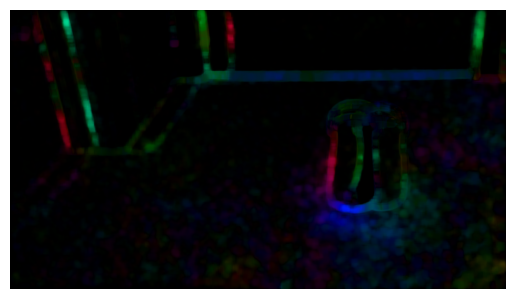

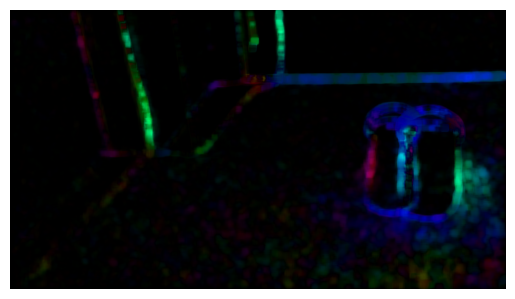

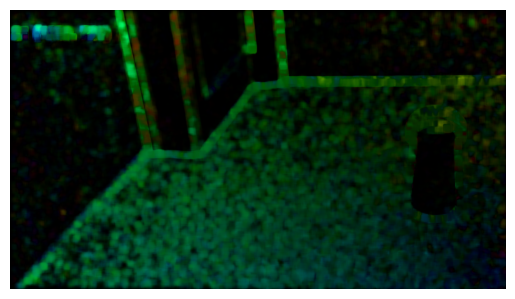

error: OpenCV(4.6.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/highgui/src/window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [ ]:
#(iii) treating every 31th frame as a reference frame
##Snapshots of dense optical flow is taken every 30 sec of video and printed below for reference
opticalFlow(31)